In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
cleaned_df = pd.read_csv('C:/Users/yeuvi/Documents/MMU Doc/Degree/Sem 2/TML 6223 - Machine Learning/heart_2020_cleaned_D2.csv')

In [3]:
# Data preprocessing
# Encode categorical variables
label_encoders = {}
for column in cleaned_df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    cleaned_df[column] = le.fit_transform(cleaned_df[column])
    label_encoders[column] = le

X = cleaned_df.drop('HeartDisease', axis=1)
y = cleaned_df['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# check data types in X_train

X_train.dtypes

BMI                 float64
Smoking               int32
AlcoholDrinking       int32
Stroke                int32
PhysicalHealth      float64
MentalHealth        float64
DiffWalking           int32
Sex                   int32
AgeCategory           int32
Race                  int32
Diabetic              int32
PhysicalActivity      int32
GenHealth             int32
SleepTime           float64
Asthma                int32
KidneyDisease         int32
SkinCancer            int32
dtype: object

In [7]:
# Initialize AdaBoost classifier
adaboost_model = AdaBoostClassifier(random_state=42)

In [8]:
# Train the model
adaboost_model.fit(X_train, y_train)

AdaBoostClassifier(random_state=42)

In [9]:
# Make predictions
y_pred = adaboost_model.predict(X_test)

In [10]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9131631201238293

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     58367
           1       0.52      0.11      0.18      5592

    accuracy                           0.91     63959
   macro avg       0.72      0.55      0.57     63959
weighted avg       0.89      0.91      0.89     63959



In [11]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[57796   571]
 [ 4983   609]]

True Positives(TP) =  57796

True Negatives(TN) =  609

False Positives(FP) =  571

False Negatives(FN) =  4983


<Axes: >

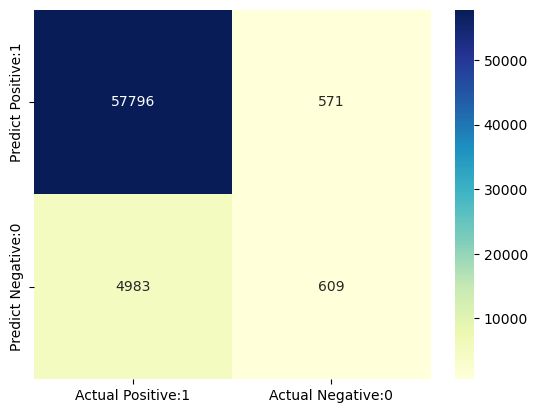

In [12]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')